In [25]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy.optimize import curve_fit
from skimage.measure import block_reduce
import sys
sys.path.insert(0,'..')
from dataloader import DataLoaderDALES, DataLoaderMicroHH
from functions import vint

# Run specifics
lp = '/home/hp200321/data/botany-6-1536-50/runs/Run_40/ppagg'
sp = lp+'/../figs'
mod = 'dales'

if mod == 'dales':
    dl = DataLoaderDALES(lp+'/..')
elif mod == 'microhh':
    dl = DataLoaderMicroHH(lp+'/..')
    
time1d = dl.time1d
rhobf = dl.rhobf

# Larger-scale processes
zf_inp = dl.zf_inp
wfls = dl.wfls
dqdt_ls = dl.dqdt_ls
dthldt_ls = dl.dthldt_ls

time = np.load(lp+'/time.npy')
plttime = np.load(lp+'/plttime.npy')
zflim = np.load(lp+'/zf.npy')

dzh = np.diff(zflim)[0] # FIXME only valid in lower part of domain

izmin = np.where(zflim[0] <= zf_inp)[0][0]
izmax = np.where(zflim[-1] < zf_inp)[0][0]

qtpf_moist_time = np.load(lp+'/qtpf_moist_time.npy')
qtpf_dry_time = np.load(lp+'/qtpf_dry_time.npy')
qtpf_prod_moist_time = np.load(lp+'/qtpf_prod_moist_time.npy')
qtpf_prod_dry_time = np.load(lp+'/qtpf_prod_dry_time.npy')
qtpf_prod_moist_wex_time = np.load(lp+'/qtpf_prod_moist_wex_time.npy')
qtpf_prod_dry_wex_time = np.load(lp+'/qtpf_prod_dry_wex_time.npy')
qtpf_vdiv_moist_time = np.load(lp+'/qtpf_vdiv_moist_time.npy')
qtpf_vdiv_dry_time = np.load(lp+'/qtpf_vdiv_dry_time.npy')
qtpf_hdiv_moist_time = np.load(lp+'/qtpf_hdiv_moist_time.npy')
qtpf_hdiv_dry_time = np.load(lp+'/qtpf_hdiv_dry_time.npy')
qtpf_subs_moist_time = np.load(lp+'/qtpf_subs_moist_time.npy')
qtpf_subs_dry_time = np.load(lp+'/qtpf_subs_dry_time.npy')
qtpf_diff_moist_time = np.load(lp+'/qtpf_diff_moist_time.npy')
qtpf_diff_dry_time = np.load(lp+'/qtpf_diff_dry_time.npy')

thlvpf_moist_time = np.load(lp+'/thlvpf_moist_time.npy')
thlvpf_dry_time = np.load(lp+'/thlvpf_dry_time.npy')
thlvpf_prod_moist_time = np.load(lp+'/thlvpf_prod_moist_time.npy')
thlvpf_prod_dry_time = np.load(lp+'/thlvpf_prod_dry_time.npy')
thlvpf_vdiv_moist_time = np.load(lp+'/thlvpf_vdiv_moist_time.npy')
thlvpf_vdiv_dry_time = np.load(lp+'/thlvpf_vdiv_dry_time.npy')
thlvpf_hdiv_moist_time = np.load(lp+'/thlvpf_hdiv_moist_time.npy')
thlvpf_hdiv_dry_time = np.load(lp+'/thlvpf_hdiv_dry_time.npy')
thlvpf_subs_moist_time = np.load(lp+'/thlvpf_subs_moist_time.npy')
thlvpf_subs_dry_time = np.load(lp+'/thlvpf_subs_moist_time.npy')
thlvpf_diff_moist_time = np.load(lp+'/thlvpf_diff_dry_time.npy')
thlvpf_diff_dry_time = np.load(lp+'/thlvpf_diff_dry_time.npy')

thlvpp_moist_time = np.load(lp+'/thlvpp_moist_time.npy')
thlvpp_dry_time = np.load(lp+'/thlvpp_dry_time.npy')
thlvpp_prod_moist_time = np.load(lp+'/thlvpp_prod_moist_time.npy')
thlvpp_prod_dry_time = np.load(lp+'/thlvpp_prod_dry_time.npy')
thlvpp_vdiv_moist_time = np.load(lp+'/thlvpp_vdiv_moist_time.npy')
thlvpp_vdiv_dry_time = np.load(lp+'/thlvpp_vdiv_dry_time.npy')
thlvpp_hdiv_moist_time = np.load(lp+'/thlvpp_hdiv_moist_time.npy')
thlvpp_hdiv_dry_time = np.load(lp+'/thlvpp_hdiv_dry_time.npy')
thlvpp_subs_moist_time = np.load(lp+'/thlvpp_subs_moist_time.npy')
thlvpp_subs_dry_time = np.load(lp+'/thlvpp_subs_dry_time.npy')
thlvpp_diff_moist_time = np.load(lp+'/thlvpp_diff_moist_time.npy')
thlvpp_diff_dry_time = np.load(lp+'/thlvpp_diff_dry_time.npy')

wthlvpf_prod_moist_time = np.load(lp+'/wthlvpf_prod_moist_time.npy')
wthlvpf_prod_dry_time =  np.load(lp+'/wthlvpf_prod_dry_time.npy')
wthlvpf_vdiv_moist_time =  np.load(lp+'/wthlvpf_vdiv_moist_time.npy')
wthlvpf_vdiv_dry_time = np.load(lp+'/wthlvpf_vdiv_dry_time.npy')
wthlvpf_hdiv_moist_time = np.load(lp+'/wthlvpf_hdiv_moist_time.npy')
wthlvpf_hdiv_dry_time = np.load(lp+'/wthlvpf_hdiv_dry_time.npy')
wthlvpf_buoy_moist_time = np.load(lp+'/wthlvpf_buoy_moist_time.npy')
wthlvpf_buoy_dry_time = np.load(lp+'/wthlvpf_buoy_dry_time.npy')
wthlvpf_pres_moist_time = np.load(lp+'/wthlvpf_pres_moist_time.npy')
wthlvpf_pres_dry_time = np.load(lp+'/wthlvpf_pres_dry_time.npy')
wthlvpf_subs_moist_time = np.load(lp+'/wthlvpf_subs_moist_time.npy')
wthlvpf_subs_dry_time = np.load(lp+'/wthlvpf_subs_dry_time.npy')
wthlvpf_diff_moist_time = np.load(lp+'/wthlvpf_diff_moist_time.npy')
wthlvpf_diff_dry_time = np.load(lp+'/wthlvpf_diff_dry_time.npy')

qlpf_vdiv_moist_time = np.load(lp+'/qlpf_vdiv_moist_time.npy')
qlpf_vdiv_dry_time = np.load(lp+'/qlpf_vdiv_dry_time.npy')

thl_av_time = np.load(lp+'/thl_av_time.npy')
thlv_av_time = np.load(lp+'/thlv_av_time.npy')
qt_av_time = np.load(lp+'/qt_av_time.npy')

thlpf_moist_time = np.load(lp+'/thlpf_moist_time.npy')
thlpf_dry_time = np.load(lp+'/thlpf_dry_time.npy')
wff_moist_time = np.load(lp+'/wff_moist_time.npy')
wff_dry_time = np.load(lp+'/wff_dry_time.npy')
qlpf_moist_time = np.load(lp+'/qlpf_moist_time.npy') 
qlpf_dry_time = np.load(lp+'/qlpf_dry_time.npy')

thlpp_moist_time = np.load(lp+'/thlpp_moist_time.npy')
thlpp_dry_time = np.load(lp+'/thlpp_dry_time.npy')
wfp_moist_time = np.load(lp+'/wfp_moist_time.npy')
wfp_dry_time = np.load(lp+'/wfp_dry_time.npy')
qlpp_moist_time = np.load(lp+'/qlpp_moist_time.npy') 
qlpp_dry_time = np.load(lp+'/qlpp_dry_time.npy')

wthlp_av_time = np.load(lp+'/wthlp_av_time.npy')
wthlpf_moist_time = np.load(lp+'/wthlpf_moist_time.npy')
wthlpf_dry_time = np.load(lp+'/wthlpf_dry_time.npy')

wqtp_av_time = np.load(lp+'/wqtp_av_time.npy')
wqtpf_moist_time = np.load(lp+'/wqtpf_moist_time.npy')
wqtpf_dry_time = np.load(lp+'/wqtpf_dry_time.npy')

wqlp_av_time = np.load(lp+'/wqlp_av_time.npy')
wqlpf_moist_time = np.load(lp+'/wqlpf_moist_time.npy')
wqlpf_dry_time = np.load(lp+'/wqlpf_dry_time.npy')
wqlpf_l_moist_time = np.load(lp+'/wqlpf_l_moist_time.npy')
wqlpf_l_dry_time = np.load(lp+'/wqlpf_l_dry_time.npy')
wqlpf_c_moist_time = np.load(lp+'/wqlpf_c_moist_time.npy')
wqlpf_c_dry_time = np.load(lp+'/wqlpf_c_dry_time.npy')
wqlpf_r_moist_time = np.load(lp+'/wqlpf_r_moist_time.npy')
wqlpf_r_dry_time = np.load(lp+'/wqlpf_r_dry_time.npy')

wthlvp_av_time = np.load(lp+'/wthlvp_av_time.npy')
wthlvpf_moist_time = np.load(lp+'/wthlvpf_moist_time.npy')
wthlvpf_dry_time = np.load(lp+'/wthlvpf_dry_time.npy')
wthlvpf_l_moist_time = np.load(lp+'/wthlvpf_l_moist_time.npy')
wthlvpf_l_dry_time = np.load(lp+'/wthlvpf_l_dry_time.npy')
wthlvpf_c_moist_time = np.load(lp+'/wthlvpf_c_moist_time.npy')
wthlvpf_c_dry_time = np.load(lp+'/wthlvpf_c_dry_time.npy')
wthlvpf_r_moist_time = np.load(lp+'/wthlvpf_r_moist_time.npy')
wthlvpf_r_dry_time = np.load(lp+'/wthlvpf_r_dry_time.npy')
wthlvpp_moist_time = np.load(lp+'/wthlvpp_moist_time.npy')
wthlvpp_dry_time = np.load(lp+'/wthlvpp_dry_time.npy')

# Flux anomaly
wthlvpf_moist_anom = wthlvpf_moist_time - wthlvp_av_time
wthlvpf_dry_anom = wthlvpf_dry_time - wthlvp_av_time

# Buoyancy approximation
thvpf_moist_time = thlvpf_moist_time + 7*thl_av_time*qlpf_moist_time
thvpf_dry_time = thlvpf_dry_time + 7*thl_av_time*qlpf_dry_time

# Mean ql (we don't have this from stats3d)
ql_av_1d = dl.load_qlav(izmin, izmax)

# Slopes of mean profiles
Gamma_thlv = thlvpf_prod_moist_time/wff_moist_time[:,1:-1]
Gamma_qt = qtpf_prod_moist_wex_time/wff_moist_time[:,1:-1]

# Tendencies of variables of interest
def tderive(var,time):
    return ((var[1:,1:-1] - var[:-1,1:-1])
           /(time[1:,np.newaxis] - time[:-1,np.newaxis])/3600)


qtpf_tend_moist_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_dry_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_moist_time[1:,:] = tderive(qtpf_moist_time, time)
qtpf_tend_dry_time[1:,:] = tderive(qtpf_dry_time, time)

thlvpf_tend_moist_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_dry_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_moist_time[1:,:] = tderive(thlvpf_moist_time, time)
thlvpf_tend_dry_time[1:,:] = tderive(thlvpf_dry_time, time)

wthlvpf_tend_moist_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_dry_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_moist_time[1:,:] = tderive(wthlvpf_moist_anom, time)
wthlvpf_tend_dry_time[1:,:] = tderive(wthlvpf_dry_anom, time)


## Reconstruct slab-mean budget terms

thl_av_1d = dl.load_thlav(izmin, izmax)
qt_av_1d = dl.load_qtav(izmin, izmax)
thlv_av_1d = thl_av_1d*(1 + 0.608*qt_av_1d)

# Tendencies
ddt_thlv_av_time = tderive(thlv_av_1d, time1d/3600)
ddt_qt_av_time = tderive(qt_av_1d, time1d/3600)

# Flux divergence (approximately, i.e. ignoring rho)
wthl_av = dl.load_wthlav(izmin, izmax)
wqt_av = dl.load_wqtav(izmin, izmax)
wthlv_av = wthl_av + 0.608*thl_av_1d*wqt_av

ddz_wthlv_av_time = ((wthlv_av[:,1:] - wthlv_av[:,:-1])/dzh)
ddz_wqt_av_time = ((wqt_av[:,1:] - wqt_av[:,:-1])/dzh)

ddz_wthlv_av_time = (ddz_wthlv_av_time[:,1:] + ddz_wthlv_av_time[:,:-1])*0.5
ddz_wqt_av_time = (ddz_wqt_av_time[:,1:] + ddz_wqt_av_time[:,:-1])*0.5

# Subsidence
Gamma_thlv_1d = (thlv_av_1d[:,1:] - thlv_av_1d[:,:-1])/dzh
Gamma_thlv_1d = (Gamma_thlv_1d[:,1:] + Gamma_thlv_1d[:,:-1])/2.

Gamma_qt_1d = (qt_av_1d[:,1:] - qt_av_1d[:,:-1])/dzh
Gamma_qt_1d = (Gamma_qt_1d[:,1:] + Gamma_qt_1d[:,:-1])/2.

wfls_dthlvdz_av_time = wfls[izmin+1:izmax-1]*Gamma_thlv_1d
wfls_dqtdz_av_time = wfls[izmin+1:izmax-1]*Gamma_qt_1d

# Large scale warming
dqdt_ls = dqdt_ls[izmin:izmax]
dthldt_ls = dthldt_ls[izmin:izmax]
dthlvdt_ls = dthldt_ls + 0.608*thl_av_1d*dqdt_ls

Initialising dataloader...
Set paths to all datasets and extracted dimensions


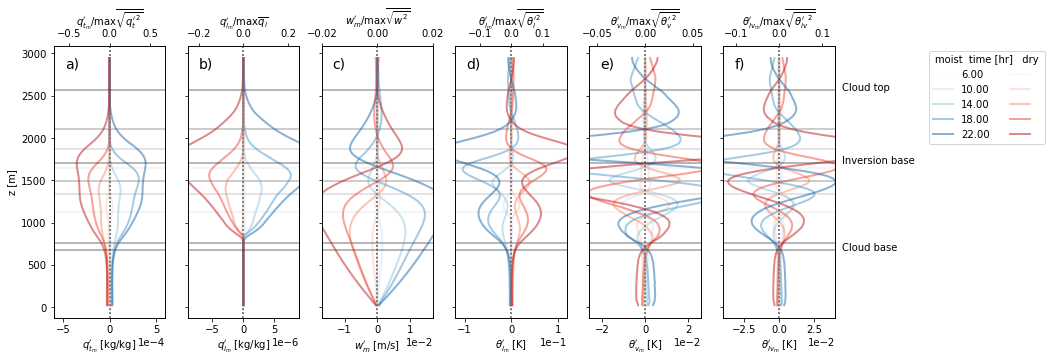

In [49]:
#%% Plotprofiles of  mesoscale-filtered variables in time
tpltmin = 6.
tpltmax = 24.
dit = 4.0 # Rounds to closest multiple of dt in time
dtav = 2.0 # Around each plotted time step
alpha = 0.5
lw=2

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1
idtplt = int(round(dit/(time[plttime[1]]-time[plttime[0]])))
idtav  = int(round(dtav/2/(time[1]-time[0])))
idtav1 = int(round(dtav/2/(time1d[1]-time1d[0])*3600))
plttime_var = np.arange(itpltmin,itpltmax,idtplt)

def add_twinx(ax, norm, offset, label, return_axs=False):
    ax2 = ax.twiny()
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    ax2.spines['top'].set_position(('axes',offset))
    ax2.set_xlim((ax.get_xlim()[0]/norm,ax.get_xlim()[1]/norm))
    ax2.set_xlabel(label)
    if return_axs:
        return ax2

ax2offs=1.0
fig,axs = plt.subplots(ncols=6,sharey=True,figsize=(14,5))
for i in range(len(plttime_var)):
    ti = time[plttime_var[i]]
    
    colm = plt.cm.Blues(i/len(plttime_var))
    cold = plt.cm.Reds(i/len(plttime_var))
    colc = plt.cm.Greys(i/len(plttime_var))
    
    it1d = np.argmin(abs(ti-time1d/3600))
    
    ql_avi = np.mean(ql_av_1d[it1d-idtav1:it1d+idtav1],axis=0)
    z_cb = zflim[ql_avi>0][1]
    
    z_ib = zflim[np.argmin(np.mean(wthlv_av[it1d-idtav1:it1d+idtav1],axis=0))]
    
    z_ct = zflim[ql_avi>0][-10]
    
    axs[0].plot(np.mean(qtpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim, 
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[0].plot(np.mean(qtpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[0].axvline(0,color='gray',linestyle='dotted')
    axs[0].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[0].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[0].annotate('a)', (0.1,0.92), xycoords='axes fraction', fontsize=14)
        axs[0].set_xlabel(r"$q_{t_m}'$ [kg/kg]")
        axs[0].set_xlim((-6e-4,6e-4))
        axs[0].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        qt2max = np.max(np.sqrt(dl.load_qt2av(izmin,izmax)[it1d]))
        add_twinx(axs[0], qt2max, ax2offs, r"$q_{t_m}'/\max \overline{\sqrt{q_t'^2}}$")

    axs[1].plot(np.mean(qlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[1].plot(np.mean(qlpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[1].axvline(0,color='gray',linestyle='dotted')
    axs[1].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[1].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[1].annotate('b)', (0.1,0.92), xycoords='axes fraction', fontsize=14)
        axs[1].set_xlabel(r"$q_{l_m}'$ [kg/kg]")
        axs[1].set_xlim((-9e-6,9e-6))
        axs[1].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        add_twinx(axs[1], np.max(ql_av_1d), ax2offs, r"$q_{l_m}'/\max \overline{q_l}$")

    axs[2].plot(np.mean(wff_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[2].plot(np.mean(wff_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[2].axvline(0,color='gray',linestyle='dotted')
    axs[2].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[2].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[2].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[2].annotate('c)', (0.1,0.92), xycoords='axes fraction', fontsize=14)
        axs[2].set_xlabel(r"$w_m'$ [m/s]")
        axs[2].set_xlim((-1.7e-2,1.7e-2))
        axs[2].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        w2max = np.max(np.sqrt(dl.load_w2tav(izmin,izmax)[it1d]))
        add_twinx(axs[2], w2max, ax2offs, r"$w_m'/\max \overline{\sqrt{w^2}}$")

    axs[3].plot(np.mean(thlpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[3].plot(np.mean(thlpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[3].axvline(0,color='gray',linestyle='dotted')
    axs[3].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[3].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[3].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[3].annotate('d)', (0.1,0.92), xycoords='axes fraction', fontsize=14)
        axs[3].set_xlabel(r"$\theta_{l_m}'$ [K]")
        axs[3].set_xlim((-1.2e-1,1.2e-1))
        axs[3].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thl2max = np.max(np.sqrt(dl.load_thl2av(izmin,izmax)[it1d]))
        axs32 = add_twinx(axs[3], thl2max, ax2offs, r"$\theta_{l_m}'/\max \overline{\sqrt{\theta_l'^2}}$", return_axs=True)
        # axs32.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

    axs[4].plot(np.mean(thvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[4].plot(np.mean(thvpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[4].axvline(0,color='gray',linestyle='dotted')
    axs[4].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[4].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[4].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == len(plttime_var)-1:
        axs[4].annotate('e)', (0.1,0.92), xycoords='axes fraction', fontsize=14)
        axs[4].set_xlabel(r"$\theta_{v_m}'$ [K]")
        axs[4].set_xlim((-2.6e-2,2.6e-2))
        axs[4].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thv2max = np.max(np.sqrt(dl.load_thv2av(izmin,izmax)[it1d]))
        axs42 = add_twinx(axs[4], thv2max, ax2offs, r"$\theta_{v_m}'/\max \overline{\sqrt{\theta_v'^2}}$", return_axs=True)
        # axs42.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
    
    axs[5].plot(np.mean(thlvpf_moist_time[plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                label='%.2f'%ti,color=colm,linestyle='-',alpha=alpha,lw=lw)
    axs[5].plot(np.mean(thlvpf_dry_time  [plttime_var[i]-idtav:plttime_var[i]+idtav,:],axis=0), zflim,
                label=' ',color=cold,linestyle='-',alpha=alpha,lw=lw)
    axs[5].axvline(0,color='gray',linestyle='dotted')
    axs[5].axhline(z_cb,color=colc,linestyle='-',alpha=alpha)
    axs[5].axhline(z_ib,color=colc,linestyle='-',alpha=alpha)
    axs[5].axhline(z_ct,color=colc,linestyle='-',alpha=alpha)
    if i == 0:
        axs[5].annotate('f)', (0.1,0.92), xycoords='axes fraction', fontsize=14)
        axs[5].set_xlabel(r"$\theta_{lv_m}'$ [K]")
        axs[5].set_xlim((-4e-2,4e-2))
        axs[5].ticklabel_format(style='sci',axis='x',scilimits=(0,0))
        thv2max = np.max(np.sqrt(dl.load_thv2av(izmin,izmax)[it1d]))
        axs52 = add_twinx(axs[5], thv2max, ax2offs, r"$\theta_{lv_m}'/\max \overline{\sqrt{\theta_{lv}'^2}}$", return_axs=True)
        # axs52.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

axs[0].set_ylabel('z [m]')
axs[5].annotate(r"Cloud base",(4.5e-2,z_cb),annotation_clip=False)
axs[5].annotate(r"Inversion base",(4.5e-2,z_ib),annotation_clip=False)
axs[5].annotate(r"Cloud top",(4.5e-2,z_ct),annotation_clip=False)
handles, labels = axs[5].get_legend_handles_labels()
handm = handles[::2];  labsm = labels[::2]
handd = handles[1::2]; labsd = labels[1::2]
handles = np.concatenate((handm,handd))
labels  = np.concatenate((labsm,labsd))
axs[5].legend(handles, labels, loc='best',bbox_to_anchor=(1.8,1),
              ncol=2,title='moist  time [hr]   dry')
plt.savefig(sp+'/vars_meso_evo.pdf', bbox_inches='tight')


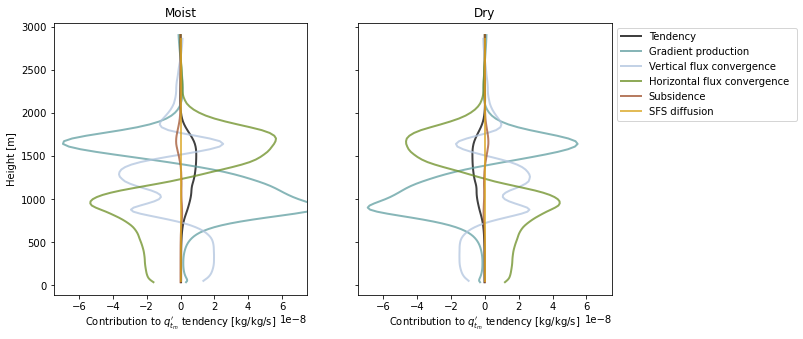

In [52]:
#%% Average budget contributions over time dimension
tpltmin = 10.
tpltmax = 20.

# Budget terms
# terms = [r"$\frac{\partial\langle\tilde{q_t'}\rangle}{\partial t}$",
#          r"$-\tilde{w'}\frac{\partial \overline{q_t}}{\partial z}$",
#          r"$-\frac{1}{\rho_0}\frac{\partial}{\partial z}\left(\rho_0\left(\widetilde{w'''q_t'''}-\overline{w'q_t'}\right)\right)$",
#          r"$-\frac{\partial}{\partial x_{hj}}\left(\widetilde{u_{hj}'q_t'}\right)$",
#          r"$-\overline{w_{LS}}\frac{\partial \tilde{q_t'}}{\partial z}$",
#          r"$\widetilde{\frac{\partial}{\partial x_j}\left(K_h\frac{\partial q_t'}{\partial x_j}\right)}+\widetilde{\frac{\partial}{\partial x_j}\left(K_h'\frac{\partial \overline{q_t}}{\partial x_j}\right)}$"
#          ]

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical flux convergence',
         'Horizontal flux convergence',
         'Subsidence',
         'SFS diffusion'
         ]

colors = ['black',
          'cadetblue',
          'lightsteelblue',
          'olivedrab',
          'sienna',
          'goldenrod',
          'lightgray']

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

qtpfmn_tend_moist = np.mean(qtpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_moist_wex = np.mean(qtpf_prod_moist_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_vdiv_moist = np.mean(qtpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_hdiv_moist = np.mean(qtpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_subs_moist = np.mean(qtpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_diff_moist = np.mean(qtpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_budg_moist = (-qtpfmn_prod_moist_wex[1:-1] - qtpfmn_vdiv_moist[1:-1]
                     -qtpfmn_hdiv_moist[1:-1] - qtpfmn_subs_moist[1:-1]
                     +qtpfmn_diff_moist)
qtpfmn_resi_moist = qtpfmn_tend_moist[1:-1] - qtpfmn_budg_moist

# The residual is mostly due to integration error of vertical transport
# -> Include the residual in this term
qtpfmn_vdiv_moist = qtpfmn_vdiv_moist[1:-1] - qtpfmn_resi_moist

qtpfmn_tend_dry = np.mean(qtpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_prod_dry_wex = np.mean(qtpf_prod_dry_wex_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_vdiv_dry = np.mean(qtpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_hdiv_dry = np.mean(qtpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_subs_dry = np.mean(qtpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_diff_dry = np.mean(qtpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
qtpfmn_budg_dry = (-qtpfmn_prod_dry_wex[1:-1] - qtpfmn_vdiv_dry[1:-1]
                     -qtpfmn_hdiv_dry[1:-1] - qtpfmn_subs_dry[1:-1]
                     +qtpfmn_diff_dry)
qtpfmn_resi_dry = qtpfmn_tend_dry[1:-1] - qtpfmn_budg_dry
qtpfmn_vdiv_dry = qtpfmn_vdiv_dry[1:-1] - qtpfmn_resi_dry


alpha = 0.75
lw = 2

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
# fig.suptitle(colors)
axs[0].plot(qtpfmn_tend_moist, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_prod_moist_wex, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_vdiv_moist, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_hdiv_moist, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(-qtpfmn_subs_moist, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot(qtpfmn_diff_moist, zflim[2:-2],c=colors[5],alpha=alpha,lw=lw)
# axs[0].plot(qtpfmn_resi_moist, zflim[2:-2],c='gray')
axs[0].set_xlabel(r"Contribution to $q_{t_m}'$ tendency [kg/kg/s]")
axs[0].set_xlim((-7.5e-8,7.5e-8))
axs[0].set_title('Moist')

axs[1].plot(qtpfmn_tend_dry, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_prod_dry_wex, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_vdiv_dry, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_hdiv_dry, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(-qtpfmn_subs_dry, zflim[1:-1],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot(qtpfmn_diff_dry, zflim[2:-2],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
# axs[1].plot(qtpfmn_resi_dry, zflim[2:-2],c='gray',label='Residual')
axs[1].set_xlabel(r"Contribution to $q_{t_m}'$ tendency [kg/kg/s]")
axs[1].set_xlim((-7.5e-8,7.5e-8))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='upper left',bbox_to_anchor=(1,1))

plt.savefig(sp+'/qtpf_budget.pdf',bbox_inches='tight')

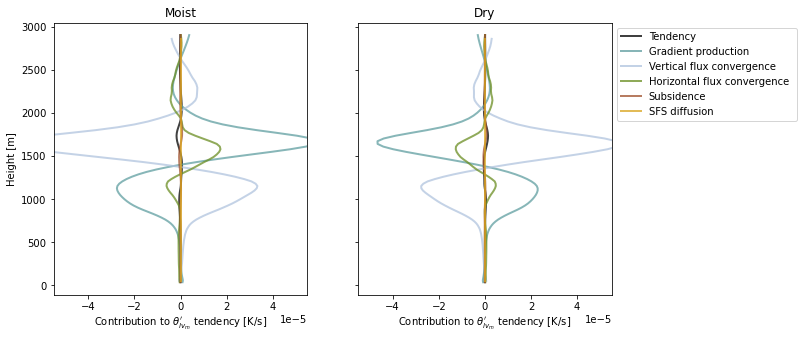

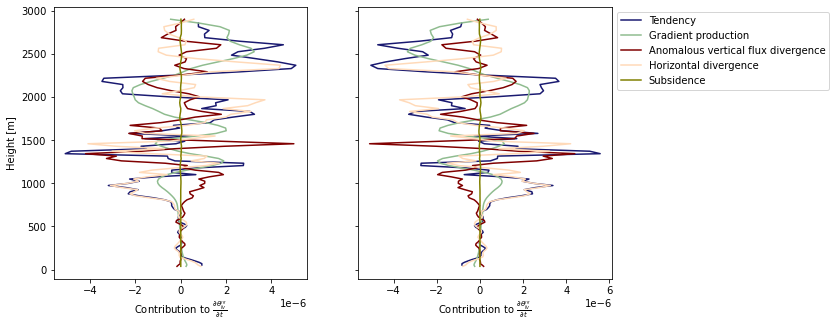

In [53]:
#%% Average thlvpf budget contributions over time dimension
tpltmin = 10.
tpltmax = 20.

terms = ['Tendency                               ',
         'Gradient production',
         'Vertical flux convergence',
         'Horizontal flux convergence',
         'Subsidence',
         'SFS diffusion'
         ]

colors = ['black',
          'cadetblue',
          'lightsteelblue',
          'olivedrab',
          'sienna',
          'goldenrod',
          'lightgray']

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

thlvpfmn_tend_moist = np.mean(thlvpf_tend_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_prod_moist = np.mean(thlvpf_prod_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_vdiv_moist = np.mean(thlvpf_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_hdiv_moist = np.mean(thlvpf_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_subs_moist = np.mean(thlvpf_subs_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_diff_moist = np.mean(thlvpf_diff_moist_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_budg_moist = (-thlvpfmn_prod_moist[1:-1] - thlvpfmn_vdiv_moist[1:-1]
                       -thlvpfmn_hdiv_moist[1:-1] - thlvpfmn_subs_moist[1:-1]
                       +thlvpfmn_diff_moist)
thlvpfmn_resi_moist = thlvpfmn_tend_moist[1:-1] - thlvpfmn_budg_moist
thlvpfmn_vdiv_moist = thlvpfmn_vdiv_moist[1:-1] - thlvpfmn_resi_moist

thlvpfmn_tend_dry = np.mean(thlvpf_tend_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_prod_dry = np.mean(thlvpf_prod_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_vdiv_dry = np.mean(thlvpf_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_hdiv_dry = np.mean(thlvpf_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_subs_dry = np.mean(thlvpf_subs_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_diff_dry = np.mean(thlvpf_diff_dry_time[itpltmin:itpltmax,:],axis=0)
thlvpfmn_budg_dry = (-thlvpfmn_prod_dry[1:-1] - thlvpfmn_vdiv_dry[1:-1]
                     -thlvpfmn_hdiv_dry[1:-1] - thlvpfmn_subs_dry[1:-1]
                     +thlvpfmn_diff_dry)
thlvpfmn_resi_dry = thlvpfmn_tend_dry[1:-1] - thlvpfmn_budg_dry
thlvpfmn_vdiv_dry = thlvpfmn_vdiv_dry[1:-1] - thlvpfmn_resi_dry

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(thlvpfmn_tend_moist, zflim[1:-1],c=colors[0],alpha=alpha,lw=lw)
axs[0].plot(-thlvpfmn_prod_moist, zflim[1:-1],c=colors[1],alpha=alpha,lw=lw)
axs[0].plot(-thlvpfmn_vdiv_moist, zflim[2:-2],c=colors[2],alpha=alpha,lw=lw)
axs[0].plot(-thlvpfmn_hdiv_moist, zflim[1:-1],c=colors[3],alpha=alpha,lw=lw)
axs[0].plot(-thlvpfmn_subs_moist, zflim[1:-1],c=colors[4],alpha=alpha,lw=lw)
axs[0].plot( thlvpfmn_diff_moist, zflim[2:-2],c=colors[5],alpha=alpha,lw=lw)
# axs[0].plot( thlvpfmn_resi_moist, zflim[2:-2],c='gray')
axs[0].set_xlabel(r"Contribution to $\theta_{lv_m}'$ tendency [K/s]")
axs[0].set_xlim((-5.5e-5,5.5e-5))
axs[0].set_title('Moist')

axs[1].plot(thlvpfmn_tend_dry, zflim[1:-1],c=colors[0],label=terms[0],alpha=alpha,lw=lw)
axs[1].plot(-thlvpfmn_prod_dry, zflim[1:-1],c=colors[1],label=terms[1],alpha=alpha,lw=lw)
axs[1].plot(-thlvpfmn_vdiv_dry, zflim[2:-2],c=colors[2],label=terms[2],alpha=alpha,lw=lw)
axs[1].plot(-thlvpfmn_hdiv_dry, zflim[1:-1],c=colors[3],label=terms[3],alpha=alpha,lw=lw)
axs[1].plot(-thlvpfmn_subs_dry, zflim[1:-1],c=colors[4],label=terms[4],alpha=alpha,lw=lw)
axs[1].plot (thlvpfmn_diff_dry, zflim[2:-2],c=colors[5],label=terms[5],alpha=alpha,lw=lw)
# axs[1].plot( thlvpfmn_resi_dry, zflim[2:-2],c='gray',label='Residual')
axs[1].set_xlabel(r"Contribution to $\theta_{lv_m}'$ tendency [K/s]")
axs[1].set_xlim((-5.5e-5,5.5e-5))
axs[1].set_title('Dry')

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1))

plt.savefig(sp+'/thlvpf_budget.pdf',bbox_inches='tight')

#%% Average thlvpp budget contributions over time dimension
tpltmin = 10.
tpltmax = 16.

itpltmin = np.where(time[plttime]>=tpltmin)[0][0]
itpltmax = np.where(time[plttime]<tpltmax)[0][-1]+1

thlvppmn_prod_moist = np.mean(thlvpp_prod_moist_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_vdiv_moist = np.mean(thlvpp_vdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_hdiv_moist = np.mean(thlvpp_hdiv_moist_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_subs_moist = np.mean(thlvpp_subs_moist_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_diff_moist = np.mean(thlvpp_diff_moist_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_budg_moist = (-thlvppmn_prod_moist[1:-1] - thlvppmn_vdiv_moist[1:-1]
                       -thlvppmn_hdiv_moist[1:-1] - thlvppmn_subs_moist[1:-1]
                       +thlvppmn_diff_moist)
thlvppmn_prod_dry = np.mean(thlvpp_prod_dry_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_vdiv_dry = np.mean(thlvpp_vdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_hdiv_dry = np.mean(thlvpp_hdiv_dry_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_subs_dry = np.mean(thlvpp_subs_dry_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_diff_dry = np.mean(thlvpp_diff_dry_time[itpltmin:itpltmax,:],axis=0)
thlvppmn_budg_dry = (-thlvppmn_prod_dry[1:-1] - thlvppmn_vdiv_dry[1:-1]
                     -thlvppmn_hdiv_dry[1:-1] - thlvppmn_subs_dry[1:-1]
                     +thlvppmn_diff_dry)

fig,axs = plt.subplots(ncols=2,sharey=True,figsize=(10,5))
axs[0].plot(thlvppmn_budg_moist, zflim[2:-2],c='midnightblue')
axs[0].plot(-thlvppmn_prod_moist, zflim[1:-1],c='darkseagreen')
axs[0].plot(-thlvppmn_vdiv_moist, zflim[1:-1],c='maroon')
axs[0].plot(-thlvppmn_hdiv_moist, zflim[1:-1],c='peachpuff')
axs[0].plot(-thlvppmn_subs_moist, zflim[1:-1],c='olive')
# axs[0].plot(thlvppmn_diff_moist[k,:], zflim[2:-2],c='skyblue')
axs[0].set_xlabel(r"Contribution to $\frac{\partial\theta_{lv}'''}{\partial t}$")

axs[1].plot(thlvppmn_budg_dry, zflim[2:-2],c='midnightblue',label='Tendency')
axs[1].plot(-thlvppmn_prod_dry, zflim[1:-1],c='darkseagreen',label='Gradient production')
axs[1].plot(-thlvppmn_vdiv_dry, zflim[1:-1],c='maroon',label='Anomalous vertical flux divergence')
axs[1].plot(-thlvppmn_hdiv_dry, zflim[1:-1],c='peachpuff',label='Horizontal divergence')
axs[1].plot(-thlvppmn_subs_dry, zflim[1:-1],c='olive',label='Subsidence')
# axs[1].plot(thlvppmn_diff_dry[k,:], zflim[2:-2],c='skyblue',label='SFS diffusion')
axs[1].set_xlabel(r"Contribution to $\frac{\partial\theta_{lv}'''}{\partial t}$")

axs[0].set_ylabel(r'Height [m]')
axs[1].legend(loc='best',bbox_to_anchor=(1,1))